# <u>Project: Benchmarking Sorting Algorithms</u>

## 1. Introduction


Sorting algorithms put items in an array into ascending or descending order. Much early research on computing algorithms was focused on sorting. Due to computers' limited ability to store data in memory, algorithms had to be developed to sort through data efficiently (Heineman et al., 2010, P.57). Sorting algorithms are significant for the following key reasons:

* Sorting algorithms are important subroutines in many other algorithms. For example, the binary search algorithm (method to search for an item in the array) requires the array to be sorted (Bhargava, 2016, P.21). 

* Sorting is an important function of many real-world applications (Cormen et al., 2009, p. 148). Websites, such as Amazon and Ebay need to be able to sort items by price, time on sale etc. 

* Finally, sorting has been such a focus of algorithm research that a a huge variety of different algorithmic techniques have been used in their development. They are, therefore, a good introduction to algorithm design (Cormen et al., 2009, p. 148).

In this project, i will write an application to benchmark five different sorting algorithms:

1. Selection Sort

2. Insertion Sort

3. Quick Sort

4. Bucket Sort

5. Pancake Sort.

Before, i get to the algorithms, i will first have to introduce **big O notation** as a means to measure time and space **complexity performance** of an algorithm. The difference between **comparison** and **non-comparison** sorting algorithms will be examined. Finally, i will touch on the importance of the **stability** of an algorithm and **in-place** sorting.

### 1.1 Big O notation and complexity performance

Measuring and comparing the time it takes a sorting algorithm to complete its task (as we are doing in this project) is one way to benchmark or compare the efficacy of algorithms. However, measuring the **performance** is not ideal as it is not **platform independent** (Mannion, P, 2019a). It can be influenced by the following:

* The computational power of the specific computer 

* The language the algorithm is written in (algorithms in a high level language like python would be slower than Java)

* The number of other processes in the computer running at the same time as the algorithm. 

Instead, we compare algorithms using their **time complexity**. We count the number of steps (operations) an algorithm takes to complete a task. Specifically, we observe how quickly the number of operations increases as the input size increases (Mannion, P, 2019a). 

Algorithmic complexity is measured in a best, average and worst case. The best case is achieved when an algorithm has its optimal input, the average case occurs on random inputs and, finally, the worst case is achieved when an algorithm gets its worst possible input (Mannion, P, 2019a). 

When comparing algorithms, we use **big O notation** in the form O(). Algorithms are usually compared on their worst case complexity.   


The following performance families are typically used to measure algorithms (Bhargava, 2016, P.20-33).

* **O(1)** *Constant time* The input size size does not affect the running time

* **O(log n)** *logarithmic time* The algorithm runs in sub-linear time (eg. a guessing game using <, = and >)

* **O(n)** *linear time* An algorithm's growth is directly proportional to the input size. Bucket sort is O(n) in the average case if the input has a uniform distribution (Cormen et al., 2009, p. 200) 

* **O(n log n)** *worse than linear*. **Comparison based** sorting algorithms do not perform faster than this in the average case (Heineman et al., 2010, P.83).

* **O(n2)** *quadratic time* The times increases exponentially - a slow sorting algorithm like **selection sort**.



**Comparison sorts** order the array only by comparing elements in the array to each other. **Selection sort** and **Quick Sort** are comparison sorts. **Non-comparison sorts** can use other functions. We will be looking at **bucket sort**, **pancake sort** and **bogo sort**

time complexity 

inplace sorting 

stability

## 2. Sorting Algorithms  

In [1]:
from random import randint
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def random_array(n):
    array = []
    for i in range(0,n,1):
        array.append(randint(0,100))
    return array

### *2.1 Selection Sort*

Selection sort is a naive comparison sorting algorithm, like bubble sort and selection sort. It is simpler and slower than more efficient comparison sort algorithms, such as Quick sort which we will examine later. 

Selection sort operates in O(n2)in best, average and worst cases. As one can see in the code below, it uses a nested for loop which results in quadratic time. 

In [3]:
lst = [2, 8, 3, 1, 5]

for i in range(len(lst)):
       minPosition = i
       for j in range(i+1, len(lst)):
           if lst[minPosition] > lst[j]:
               minPosition = j  
       temp = lst[i]
       lst[i] = lst[minPosition]
       lst[minPosition] = temp
print (lst)

[1, 2, 3, 5, 8]


In [4]:
def selectionSort(alist):

   for i in range(len(alist)):
       minPosition = i
       for j in range(i+1, len(alist)):
           if alist[minPosition] > alist[j]:
               minPosition = j  
       temp = alist[i]
       alist[i] = alist[minPosition]
       alist[minPosition] = temp
   return alist


In [3]:
def array_size(fnc, array):
    outres = []
    for i in array:
        num_runs = 10
        inres = []
        for r in range(num_runs):
            start_time = time.time()
    
            fnc(random_array(i))
    
            end_time = time.time()
    
            time_elapsed = end_time - start_time
            
            #time_elapsed = int(round(time_elapsed * 1000)) https://stackoverflow.com/questions/5998245/get-current-time-in-milliseconds-in-python
    
            inres.append(time_elapsed)

        average = np.average(inres)
        outres.append(average)
    return outres



In [6]:
ssinput = [100, 250, 500, 750, 1000, 1250, 2500, 3750, 5000, 6250, 7500, 8750, 10000]

sstime = array_size(selectionSort, ssinput)


KeyboardInterrupt: 

In [ ]:
selectionSortDF = pd.DataFrame({"Input": ssinput, "Time": sstime})

In [ ]:
plt.plot('Input', 'Time', data=selectionSortDF)
plt.xlabel("Input Size")
plt.ylabel("Time in seconds")
plt.title("Selection Sort Benchmark")
plt.show()

### 2.2 Insertion Sort

In [4]:
def insertionSort(lst): #https://codereview.stackexchange.com/questions/139056/insertion-sort-in-python
    for index in range(1, len(lst)):

        currentvalue = lst[index]
        position = index

        while position > 0 and lst[position - 1] > currentvalue:
            lst[position] = lst[position - 1]
            position = position - 1

        lst[position] = currentvalue
    return lst

In [ ]:
isinput = [100, 250, 500, 750, 1000, 1250, 2500, 3750, 5000, 6250, 7500, 8750, 10000]

istime = array_size(insertionSort, isinput)

In [ ]:
insertionSortDF = pd.DataFrame({"Input": isinput, "Time": istime})

In [ ]:
plt.plot('Input', 'Time', data=insertionSortDF)
plt.xlabel("Input Size")
plt.ylabel("Time in seconds")
plt.title("Insertion Sort Benchmark")
plt.show()

### *2.2 Quick Sort*

In [ ]:
# https://github.com/egonSchiele/grokking_algorithms/blob/master/04_quicksort/python/05_quicksort.py
def quickSort(array):
  if len(array) < 2:
    # base case, arrays with 0 or 1 element are already "sorted"
    return array
  else:
    # recursive case
    pivot = array[0]
    # sub-array of all the elements less than the pivot
    less = [i for i in array[1:] if i <= pivot] # iterates through the array from pivot + 1 to the end. 
                                                # Less is an array of items less or equal to pivot
    greater = [i for i in array[1:] if i > pivot] # greater is an array of items greater than pivot
    return quickSort(less) + [pivot] + quickSort(greater)



In [ ]:
qsinput = [100, 250, 500, 750, 1000, 1250, 2500, 3750, 5000, 6250, 7500, 8750, 10000]

qstime = array_size(quickSort, qsinput)


In [ ]:
quickSortDF = pd.DataFrame({"Input": qsinput, "Time": qstime})

In [ ]:
plt.plot('Input', 'Time', data=quickSortDF)
plt.xlabel("Input Size")
plt.ylabel("Time in seconds")
plt.title("quick Sort Benchmark")
plt.show()

### *2.3 Pancake Sort*

In [ ]:
def pancakeSort(nums):
    arr_len = len(nums)
    while arr_len > 1:
        mi = nums.index(max(nums[0:arr_len]))
        nums = nums[mi::-1] + nums[mi+1:len(nums)]
        nums = nums[arr_len-1::-1] + nums[arr_len:len(nums)]
        arr_len -= 1
    return nums

In [ ]:
psinput = [100, 250, 500, 750, 1000, 1250, 2500, 3750, 5000, 6250, 7500, 8750, 10000]

pstime = array_size(pancakeSort, psinput)

In [ ]:
pancakeSortDF = pd.DataFrame({"Input": psinput, "Time": pstime})

In [ ]:
plt.plot('Input', 'Time', data=pancakeSortDF)
plt.xlabel("Input Size")
plt.ylabel("Time in seconds")
plt.title("Pancake Sort Benchmark")
plt.show()

### 2.5 Bucket Sort


In [15]:
def bucketSort(alist): # https://www.sanfoundry.com/python-program-implement-bucket-sort/
    largest = max(alist)
    length = len(alist)
    size = largest/length
 
    buckets = [[] for _ in range(length)] # creates empty lists equal to the length of the list
    for i in range(length): # iterates through each item in the array
        j = int(alist[i]/size)# divides the array item by the size, roounds down to the nearest integer 
        if j != length:
            buckets[j].append(alist[i]) # places the array item into the corresponding bucket (calculated above)
        else:
            buckets[length - 1].append(alist[i])# This places the max number in the highest array
 
    for i in range(length): # insertion sort is performed on each bucket
        insertionSort(buckets[i])
 
    result = []
    for i in range(length): # once each bucket is sorted, join them together to created the final unsorted array
        result = result + buckets[i]
 
    return result


 

In [17]:
bsinput = [100, 250, 500, 750, 1000, 1250, 2500, 3750, 5000, 6250, 7500, 8750, 10000]

bstime = array_size(bucketSort, bsinput)

In [18]:
bucketSortDF = pd.DataFrame({"Input": bsinput, "Time": bstime})

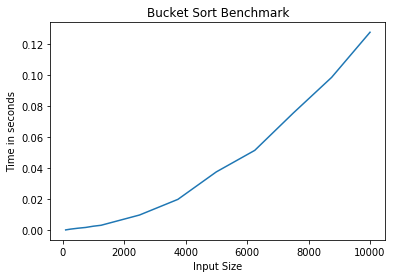

In [19]:
plt.plot('Input', 'Time', data=bucketSortDF)
plt.xlabel("Input Size")
plt.ylabel("Time in seconds")
plt.title("Bucket Sort Benchmark")
plt.show()

### *2.4 Bogo Sort*

In [28]:
def bogoSort(lst):
    np.random.shuffle(lst)  # must shuffle it first or it's a bug if lst was pre-sorted! :)
    while lst != sorted(lst):
        np.random.shuffle(lst)
    return lst

In [30]:
bsinput = [100, 250, 500, 750]

bstime = array_size(bogoSort, bsinput)

KeyboardInterrupt: 

In [ ]:
bogoSortDF = pd.DataFrame({"Input": bsinput, "Time": bstime})